# PROJET Machine Learning
## groupe 7- Sujet: The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis.
               
               Salimata FAYE   
              

### C'est quoi l'analyse des sentiments
L'acte de reconnaître et de catégoriser informatiquement les opinions contenues dans un morceau de texte, notamment afin de discerner si l'écrivain a une attitude bonne, négative ou neutre envers un sujet, un produit, etc.

L'analyse des sentiments est une technique permettant d'analyser un morceau de texte afin de déterminer le sentiment qu'il contient. Pour ce faire, il combine l’apprentissage automatique et le traitement du langage naturel (NLP).

### Objectif du problème :
L'objectif principal du projet est de prédire le sentiment d'un certain nombre de critiques de films obtenues à partir de la base de données de films Internet (IMDb).

### Base de données
Cet ensemble de données contient 50 000 critiques de films pré-étiquetées avec des étiquettes de classe de sentiments « positifs » et « négatifs » en fonction du contenu de la critique. L'ensemble de données peut être obtenu sur  https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

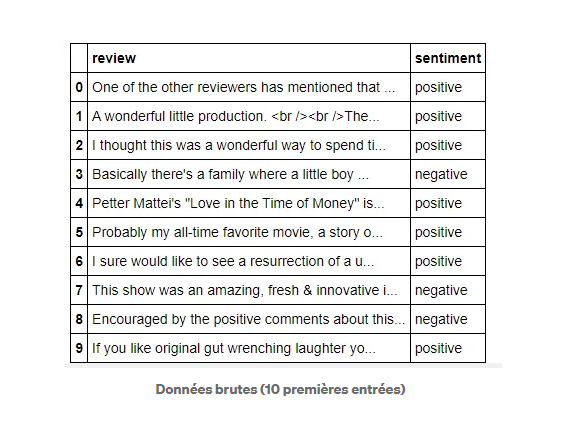

### Importation des Bibliothèques

In [1]:
!pip install catboost
!pip install xgboost

  Using cached catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 108.9 kB/s eta 0:15:34
   ---------------------------------------- 0.0/101.7 MB 108.9 kB/s eta 0:15:34
   ---------------------------------------- 0.0/101.7 MB 131.3 kB/s eta 0:12:55
   ---------------------------------------- 0.0/101.7 MB 131.3 kB/s eta 0:12:55
   ---------------------------------------- 0.0/101.7 MB 131.3 kB/s eta 0:12:55
   ---------------------------------------- 0.0/101.7 MB 93.7 kB/s eta 0:18:06
   ---------------------------------------- 0.0/101.7 MB 93.7 kB/s eta 0:18:06
   ---------------------------------------- 0.1/101.7 MB 109.2 kB/s eta 0:15:32
   -------

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Import de la base de données 

In [7]:
data_imdb = pd.read_csv("C:\\Users\\pc\Desktop\\UVS M1_M2\\Semestre 3\\Projet Machine Learning\\IMDB Dataset.csv")
print(data_imdb.shape) 
data_imdb.head(5)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Etudes des données

In [8]:
data_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
# Structure des review et leur sentiments
for i in range(5):
    print("Review: ",[i])
    print(data_imdb['review'].iloc[i], "\n")
    print("Sentiment: ",data_imdb['sentiment'].iloc[i],"\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d


## Prétraitement et Normalisation du texte

L'une des étapes clés avant de se lancer dans le processus d'ingénierie et de modélisation des fonctionnalités consiste à nettoyer, prétraiter et normaliser le texte pour amener les composants du texte tels que les phrases et les mots dans un format standard. Cela permet la normalisation dans un corpus de documents, ce qui permet de créer des fonctionnalités significatives et de réduire le bruit pouvant être introduit en raison de nombreux facteurs tels que des symboles non pertinents, des caractères spéciaux, des balises XML et HTML, etc.

### • Conversion en minuscules

In [5]:
 # Définition de la fonction to_lower prenant un paramètre text
def to_lower(text):
    text = text.lower() # Conversion du texte en minuscules à l'aide de la méthode lower()
    return text # Renvoi du texte converti en minuscules

### • Tokenisation du texte
La tokenisation consiste à diviser un texte en unités linguistiques plus petites appelées "tokens". Un token peut être un mot individuel, une ponctuation ou même une partie d'un mot, selon la façon dont le texte est analysé.Par exemple, pour la phrase "Le chat est sur le tapis.", la tokenisation peut produire les tokens suivants : ["Le", "chat", "est", "sur", "le", "tapis", "."]. Chaque mot et signe de ponctuation est extrait comme un token distinct.  
La tokenisation est souvent réalisée en utilisant des techniques telles que la séparation par des espaces, la reconnaissance de motifs (regex) ou l'utilisation de modèles de langage. 
Pour notre cas on utilsera la technique de séparation par des espaces

In [6]:
# Tokenisation du texte
def tokenze(text): # La fonction tokenze prend un paramètre text qui représente le texte à tokeniser
    tokens = word_tokenize(text)     # Utilisation de word_tokenize de la bibliothèque nltk pour découper le texte en mots
    return tokens      # Renvoie la liste des tokens (mots) obtenus après la tokenisation

###  • Nettoyage du texte : balise html et bracket
Notre texte contient souvent du contenu inutile comme des balises HTML, qui n'ajoutent pas beaucoup de valeur lors de l'analyse des sentiments. Nous devons donc nous assurer de les supprimer avant d’extraire les fonctionnalités.
La bibliothèque BeautifulSoup fait un excellent travail en fournissant les fonctions nécessaires à cet effet.

In [7]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

### • Suppression les caractères spéciaux  :
Une autre tâche importante dans le nettoyage et la normalisation du texte consiste à supprimer les caractères spéciaux et les symboles qui ajoutent souvent du bruit supplémentaire dans le texte non structuré. Des expressions régulières simples peuvent être utilisées pour y parvenir. C'est votre choix de conserver les numéros ou de les supprimer, si vous ne les souhaitez pas dans votre corpus normalisé.


In [8]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

### • Stemming text :
Le stemming est une technique permettant d'éliminer les affixes des mots afin de récupérer la forme de base. C'est la même chose que de tailler les branches d'un arbre jusqu'au tronc. La racine des termes manger, manger et mangé, par exemple, est manger.

In [9]:
#Stemming the text
def simple_stemmer(text): # prend une liste de mots en entré
    ps=nltk.porter.PorterStemmer()
    text=[ps.stem(word) for word in text]
    return text



### • Suppression des mots vides et normalisation
Les mots vides, également connus sous le nom de stop words en anglais, sont des mots très courants qui sont souvent filtrés ou supprimés lors du traitement du texte car ils ne contribuent pas beaucoup au sens d'une phrase ou d'un document. Ces mots vides incluent des mots comme a", "the", "an", "this", etc., qui sont très fréquents dans la langue mais qui ne portent généralement pas beaucoup d'informations discriminantes lors de l'analyse textuelle.

In [10]:
#set stopwords to english
def stop(text):
    stop_words=set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    return text

### Vue du texte normalisé

In [11]:
def clean_text(text):
    text=to_lower(text)
    text=strip_html(text)
    text=remove_between_square_brackets(text)
    text=remove_special_characters(text, remove_digits=True)
    text=tokenze(text)
    text=stop(text)
    text=simple_stemmer(text)
    text = ' '.join(text)  # Rejoindre les mots en une seule chaîne de texte
    return text
data_imdb['review_cleaned']=data_imdb['review'].apply(clean_text) # Appliquer la fonction clean_text à chaque avis dans la colonne 'review' du DataFrame data_imdb
data_imdb.head()

C:\Users\Oumar Sall\AppData\Local\Temp\ipykernel_7040\4211121556.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment,review_cleaned
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod youll hoo...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


## Analyse descriptive

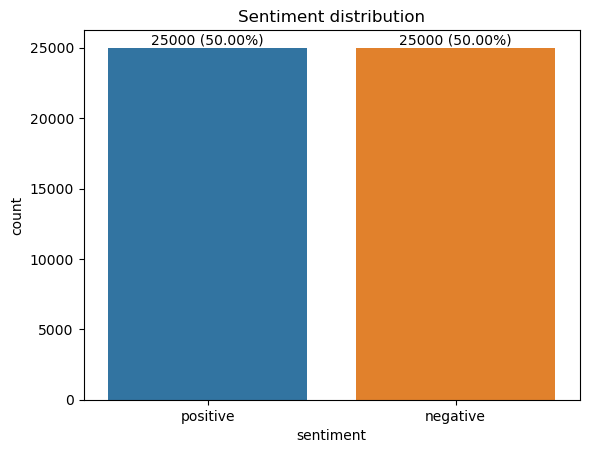

In [12]:
# Distribuition des sentiment 
sns.countplot(x='sentiment',data=data_imdb)
plt.title('Sentiment distribution')
#Ajouter les étiquettes des barres (nombre d'occurrences et proportion
repartition = data_imdb['sentiment'].value_counts()
pourcentage = data_imdb['sentiment'].value_counts(normalize=True)
for i, (count, proportion) in enumerate(zip(repartition[::-1], pourcentage[::-1])):
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

### Le nombre de mots

In [13]:
# Count the number of word 
def nb_word(text):
    words=text.split() # Diviser le texte en mots en utilisant l'espace comme séparateur
    word_count=len(words)
    return word_count

In [14]:
data_imdb['word count']=data_imdb['review'].apply(nb_word)
data_imdb['word count cleaned']=data_imdb['review_cleaned'].apply(nb_word)
data_imdb.head()

,review,sentiment,review_cleaned,word count,word count cleaned
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod youll hoo...,307,168
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...,162,84
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,166,86
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...,138,67
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,230,125


###  Separation des reviews

#### Les reviews positives 

In [15]:
pos_reviews=data_imdb[data_imdb.sentiment=='positive']
pos_reviews.head()

,review,sentiment,review_cleaned,word count,word count cleaned
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod youll hoo...,307,168
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...,162,84
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,166,86
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,230,125
5,"Probably my all-time favorite movie, a story o...",positive,probabl alltim favorit movi stori selfless sac...,119,58


In [14]:
pos_reviews.shape

(25000, 2)

#### Les reviews négatives

In [16]:
neg_reviews=data_imdb[data_imdb.sentiment=='negative']
neg_reviews.head()

,review,sentiment,review_cleaned,word count,word count cleaned
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...,138,67
7,"This show was an amazing, fresh & innovative i...",negative,show amaz fresh innov idea 70 first air first ...,174,83
8,Encouraged by the positive comments about this...,negative,encourag posit comment film look forward watch...,130,64
10,Phil the Alien is one of those quirky films wh...,negative,phil alien one quirki film humour base around ...,96,51
11,I saw this movie when I was about 12 when it c...,negative,saw movi 12 came recal scariest scene big bird...,180,84


### Analyse  des mots

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fonction pour générer le word cloud
def generer_wordcloud(article, titre):
    texte = ' '.join(article)
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()


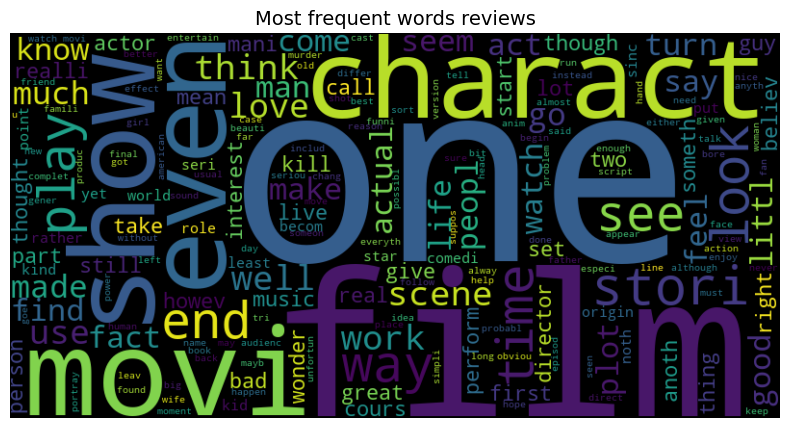

In [18]:
generer_wordcloud(data_imdb['review_cleaned'], "Most frequent words reviews")

In [19]:
from collections import Counter
count = Counter() # Initialisation d'un compteur pour compter les occurrences de chaque mot
for text in data_imdb['review_cleaned'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movi', 98936),
 ('film', 92059),
 ('one', 52649),
 ('like', 43820),
 ('time', 29798),
 ('good', 28899),
 ('make', 28567),
 ('get', 27716),
 ('see', 27569),
 ('charact', 27568),
 ('watch', 27066),
 ('even', 24747),
 ('stori', 24219),
 ('would', 23999),
 ('realli', 22895)]

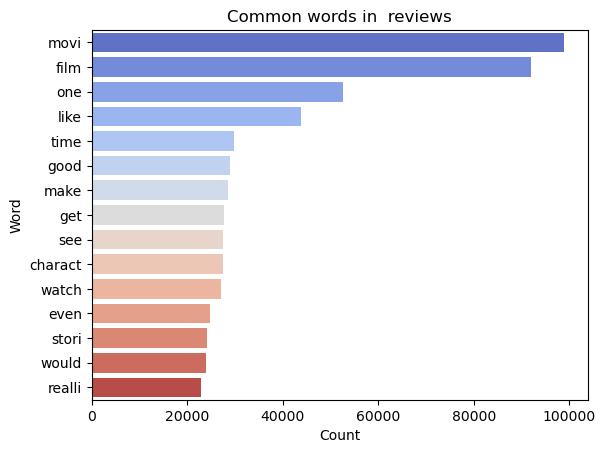

In [20]:
words = pd.DataFrame(count.most_common(15))
words.columns = ['word', 'count']
sns.barplot(data=words, x='count', y='word', palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Common words in  reviews')
plt.show()


#### The positives reviews

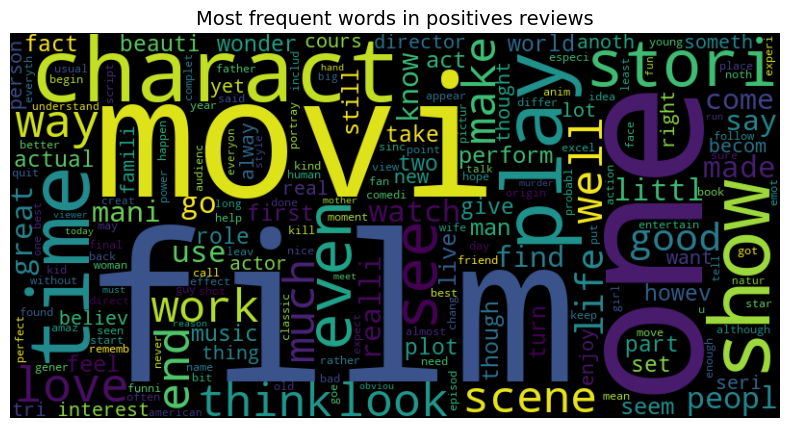

In [21]:
generer_wordcloud(pos_reviews['review_cleaned'], "Most frequent words in positives reviews")

In [22]:
from collections import Counter
count = Counter()
for text in pos_reviews['review_cleaned'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 49000),
 ('movi', 43093),
 ('one', 26948),
 ('like', 19882),
 ('time', 15461),
 ('see', 14682),
 ('good', 14563),
 ('stori', 13645),
 ('charact', 13627),
 ('make', 13165),
 ('great', 12794),
 ('get', 12577),
 ('watch', 12492),
 ('love', 12060),
 ('well', 11301)]

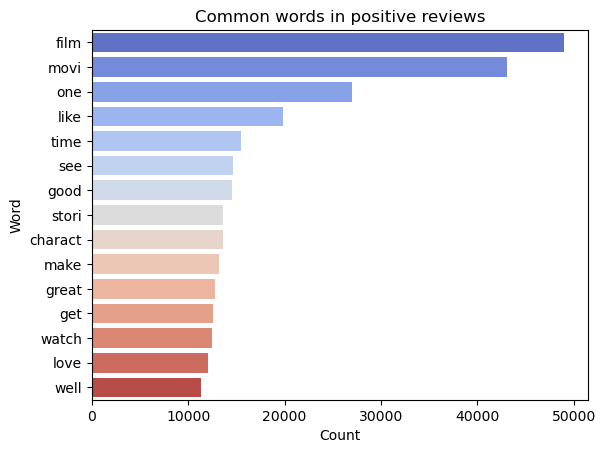

In [23]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
sns.barplot(data=pos_words, x='count', y='word', palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Common words in positive reviews')
plt.show()


#### The negatives reviews

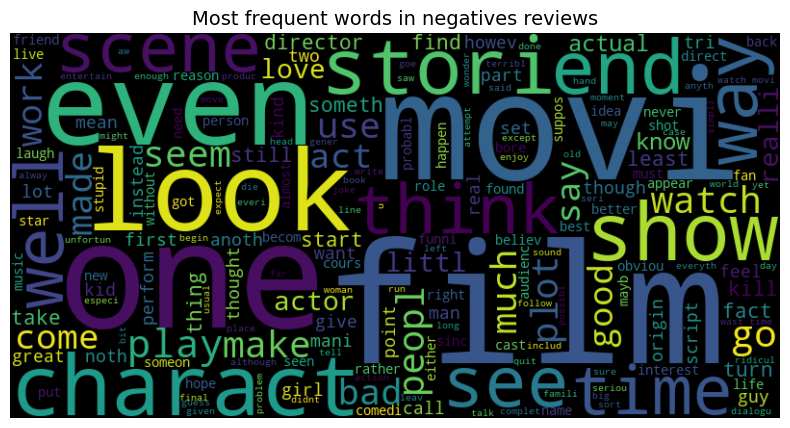

In [24]:
generer_wordcloud(neg_reviews['review_cleaned'],"Most frequent words in negatives reviews")

In [25]:
from collections import Counter
count = Counter()
for text in neg_reviews['review_cleaned'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movi', 55843),
 ('film', 43059),
 ('one', 25701),
 ('like', 23938),
 ('make', 15402),
 ('get', 15139),
 ('even', 15096),
 ('watch', 14574),
 ('time', 14337),
 ('good', 14336),
 ('bad', 14128),
 ('charact', 13941),
 ('would', 13631),
 ('see', 12887),
 ('realli', 12221)]

In [26]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movi,55843
1,film,43059
2,one,25701
3,like,23938
4,make,15402


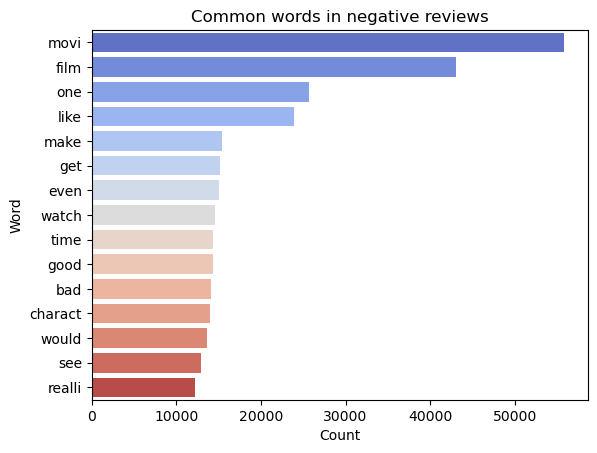

In [27]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
sns.barplot(data=neg_words, x='count', y='word', palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Common words in negative reviews')
plt.show()


## Conception, entrainement et évaluation d'un model sur le sentiment 

### Le Pipeline

Un pipeline en machine learning est une séquence d'étapes qui permet de transformer et de modéliser les données de manière automatique et cohérente. Voici les composants principaux d'un pipeline typique :

**Prétraitement des données** : Cette étape comprend le nettoyage des données (par exemple, la suppression des valeurs manquantes, le traitement des caractére spéciaux etc...), la transformation des variables (par exemple, la normalisation, la discrétisation, l'encodage), et la sélection des caractéristiques pertinentes.

**Modélisation** : Une fois que les données sont préparées, le pipeline inclut l'étape où le modèle de machine learning est sélectionné et entraîné sur les données traitées. Cela peut inclure l'ajustement des hyperparamètres du modèle pour obtenir de meilleures performances.

**Évaluation** : Après avoir entraîné le modèle, le pipeline évalue sa performance en utilisant des métriques appropriées pour la tâche (par exemple, précision, rappel, F1-score pour la classification).

**Déploiement** : Dans certains cas, le pipeline peut également inclure des étapes pour déployer le modèle entraîné dans un environnement de production, prêt à être utilisé pour des prédictions en temps réel.

En résumé, un pipeline en machine learning permet d'automatiser et de standardiser le processus complet de prétraitement des données, d'entraînement du modèle, d'évaluation et éventuellement de déploiement, ce qui facilite le développement et la mise en production de modèles de machine learning.

### méthode de conversion du texte en numérique

**TF-IDF (Term Frequency-Inverse Document Frequency)**
TF-IDF est une technique utilisée en traitement automatique du langage naturel (NLP) pour évaluer l'importance d'un terme dans un document par rapport à une collection de documents. Elle combine la fréquence du terme (TF) et l'inverse de la fréquence dans les documents (IDF).

TF mesure le nombre de fois qu'un terme apparaît dans un document, tandis que IDF évalue l'importance d'un terme dans la collection globale de documents en réduisant le poids des termes fréquents.

En utilisant TF-IDF, on peut attribuer une valeur numérique à chaque terme, reflétant à la fois sa fréquence dans le document et son importance relative dans la collection de documents.
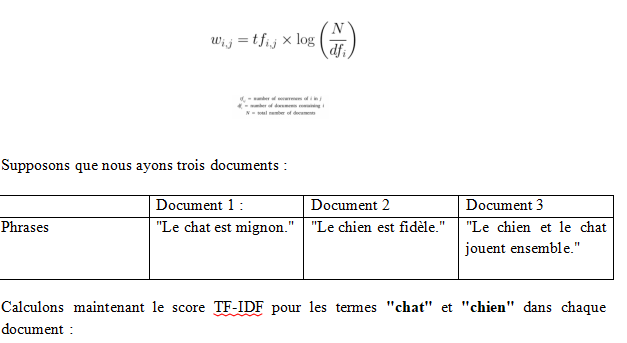

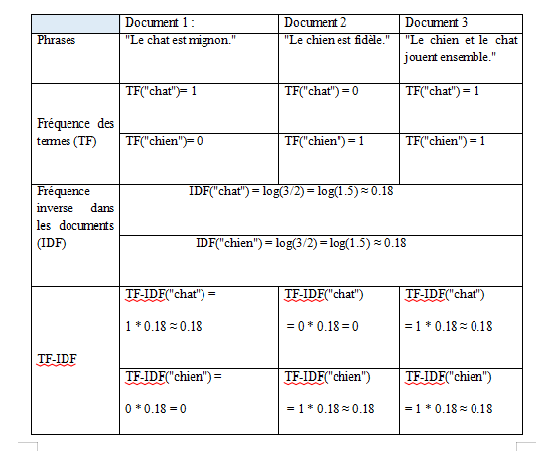


### Conception et entraitement du model

      LogisticRegression()

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import LinearSVC

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cleaned_texts = []
        for text in X:
            text = text.lower()  # Mettre en minuscule
            text = re.sub(r'<.*?>', '', text)  # Supprimer le HTML
            text = re.sub(r'\[.*?\]', '', text)  # Supprimer les crochets carrés et leur contenu
            text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer les caractères spéciaux et les chiffres
            words = word_tokenize(text)  # Tokenisation
            words = [word for word in words if word not in stopwords.words('english')]  # Supprimer les mots vides
            stemmer = PorterStemmer()
            words = [stemmer.stem(word) for word in words]  # Stemming
            cleaned_text = ' '.join(words)
            cleaned_texts.append(cleaned_text)
        return cleaned_texts
    

# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
features=data_imdb['review']
target=data_imdb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Définition du pipeline
pipeline = Pipeline([
    ('cleaner', TextCleaner()),  # Étape de nettoyage de texte
    ('vectorizer', TfidfVectorizer()),  # Vectorisation des mots avec TF-IDF
    ('classifier', LogisticRegression())  # Modèle de régression logistique
])
# Entraînement du pipeline
pipeline.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      7262
    positive       0.90      0.88      0.89      7738

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



NameError: name 'confusion_matrix' is not defined

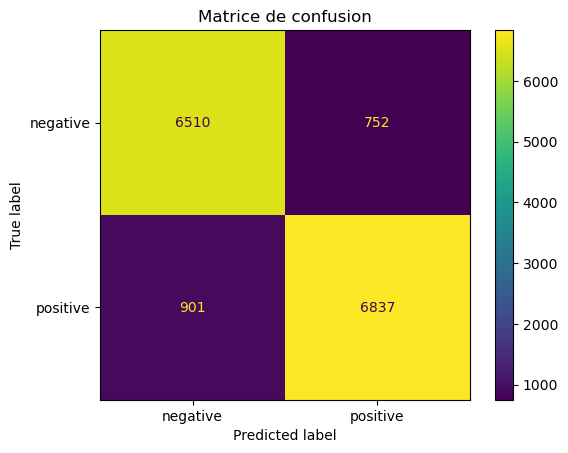

Score de précision moyenne: 0.8898 soit: 88.98%


In [33]:
from sklearn import metrics
y_pred = pipeline.predict(X_test)
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["negative","positive"])
cm_display.plot()
plt.title("Matrice de confusion")
plt.show()

from sklearn.metrics import f1_score,accuracy_score

# Calculer le score de précision moyenne
avg_precision =accuracy_score(y_test,y_pred)
print("Score de précision moyenne:", avg_precision,"soit: {:.2f}%".format( avg_precision*100))

    CatBoostClassifier

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from catboost import CatBoostClassifierCatBoostClassifier  # Import CatBoostClassifier
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cleaned_texts = []
        for text in X:
            text = text.lower()  # Mettre en minuscule
            text = re.sub(r'<.*?>', '', text)  # Supprimer le HTML
            text = re.sub(r'\[.*?\]', '', text)  # Supprimer les crochets carrés et leur contenu
            text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer les caractères spéciaux et les chiffres
            words = word_tokenize(text)  # Tokenisation
            words = [word for word in words if word not in stopwords.words('english')]  # Supprimer les mots vides
            stemmer = PorterStemmer()
            words = [stemmer.stem(word) for word in words]  # Stemming
            cleaned_text = ' '.join(words)
            cleaned_texts.append(cleaned_text)
        return cleaned_texts
    

# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
features = data_imdb['review']
target = data_imdb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Définition du pipeline avec CatBoostClassifier
pipeline1 = Pipeline([
    ('cleaner', TextCleaner()),  # Étape de nettoyage de texte
    ('vectorizer', CountVectorizer()),  # Vectorisation des mots avec TF-IDF
    ('classifier', CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, cat_features=[]))  # Modèle CatBoost
])

# Entraînement du pipeline
pipeline1.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Prédictions et évaluation
y_pred = pipeline1.predict(X_test)
print(classification_report(y_test, y_pred))  # Utiliser y_test et y_pred dans le classification_report
#print(confusion_matrix(y_test,y_pred))


0:	learn: 0.6632215	total: 1.11s	remaining: 9m 12s
1:	learn: 0.6399975	total: 2.03s	remaining: 8m 24s
2:	learn: 0.6219472	total: 2.92s	remaining: 8m 4s
3:	learn: 0.6073343	total: 3.83s	remaining: 7m 54s
4:	learn: 0.5952040	total: 4.74s	remaining: 7m 48s
5:	learn: 0.5860758	total: 5.63s	remaining: 7m 43s
6:	learn: 0.5772465	total: 6.52s	remaining: 7m 39s
7:	learn: 0.5692062	total: 7.45s	remaining: 7m 38s
8:	learn: 0.5620580	total: 8.32s	remaining: 7m 34s
9:	learn: 0.5561633	total: 9.22s	remaining: 7m 31s
10:	learn: 0.5500606	total: 10.1s	remaining: 7m 28s
11:	learn: 0.5446568	total: 11s	remaining: 7m 25s
12:	learn: 0.5396640	total: 11.8s	remaining: 7m 22s
13:	learn: 0.5354286	total: 12.7s	remaining: 7m 20s
14:	learn: 0.5302309	total: 13.5s	remaining: 7m 17s
15:	learn: 0.5260206	total: 14.4s	remaining: 7m 16s
16:	learn: 0.5217352	total: 15.3s	remaining: 7m 15s
17:	learn: 0.5180226	total: 16.2s	remaining: 7m 13s
18:	learn: 0.5142444	total: 17.1s	remaining: 7m 12s
19:	learn: 0.5103351	tota

157:	learn: 0.3560309	total: 2m 17s	remaining: 4m 58s
158:	learn: 0.3554677	total: 2m 18s	remaining: 4m 57s
159:	learn: 0.3548827	total: 2m 19s	remaining: 4m 56s
160:	learn: 0.3543803	total: 2m 20s	remaining: 4m 55s
161:	learn: 0.3538461	total: 2m 21s	remaining: 4m 54s
162:	learn: 0.3533274	total: 2m 22s	remaining: 4m 54s
163:	learn: 0.3528600	total: 2m 23s	remaining: 4m 53s
164:	learn: 0.3523554	total: 2m 23s	remaining: 4m 52s
165:	learn: 0.3517500	total: 2m 24s	remaining: 4m 51s
166:	learn: 0.3512607	total: 2m 25s	remaining: 4m 50s
167:	learn: 0.3507761	total: 2m 26s	remaining: 4m 49s
168:	learn: 0.3503169	total: 2m 27s	remaining: 4m 48s
169:	learn: 0.3498243	total: 2m 28s	remaining: 4m 47s
170:	learn: 0.3493511	total: 2m 29s	remaining: 4m 46s
171:	learn: 0.3488419	total: 2m 29s	remaining: 4m 46s
172:	learn: 0.3484108	total: 2m 30s	remaining: 4m 45s
173:	learn: 0.3479379	total: 2m 31s	remaining: 4m 44s
174:	learn: 0.3474363	total: 2m 32s	remaining: 4m 43s
175:	learn: 0.3469624	total:

310:	learn: 0.2991570	total: 4m 29s	remaining: 2m 43s
311:	learn: 0.2988825	total: 4m 30s	remaining: 2m 42s
312:	learn: 0.2985912	total: 4m 30s	remaining: 2m 41s
313:	learn: 0.2983344	total: 4m 31s	remaining: 2m 41s
314:	learn: 0.2981948	total: 4m 32s	remaining: 2m 40s
315:	learn: 0.2980364	total: 4m 33s	remaining: 2m 39s
316:	learn: 0.2977836	total: 4m 34s	remaining: 2m 38s
317:	learn: 0.2974984	total: 4m 35s	remaining: 2m 37s
318:	learn: 0.2972778	total: 4m 35s	remaining: 2m 36s
319:	learn: 0.2969702	total: 4m 36s	remaining: 2m 35s
320:	learn: 0.2968236	total: 4m 37s	remaining: 2m 34s
321:	learn: 0.2965412	total: 4m 38s	remaining: 2m 33s
322:	learn: 0.2964545	total: 4m 39s	remaining: 2m 33s
323:	learn: 0.2961385	total: 4m 40s	remaining: 2m 32s
324:	learn: 0.2958244	total: 4m 41s	remaining: 2m 31s
325:	learn: 0.2955519	total: 4m 41s	remaining: 2m 30s
326:	learn: 0.2953079	total: 4m 42s	remaining: 2m 29s
327:	learn: 0.2951156	total: 4m 43s	remaining: 2m 28s
328:	learn: 0.2948150	total:

464:	learn: 0.2680099	total: 6m 39s	remaining: 30.1s
465:	learn: 0.2679585	total: 6m 40s	remaining: 29.2s
466:	learn: 0.2677840	total: 6m 41s	remaining: 28.4s
467:	learn: 0.2677294	total: 6m 42s	remaining: 27.5s
468:	learn: 0.2675631	total: 6m 42s	remaining: 26.6s
469:	learn: 0.2673645	total: 6m 43s	remaining: 25.8s
470:	learn: 0.2673124	total: 6m 44s	remaining: 24.9s
471:	learn: 0.2670982	total: 6m 45s	remaining: 24.1s
472:	learn: 0.2670455	total: 6m 46s	remaining: 23.2s
473:	learn: 0.2668208	total: 6m 47s	remaining: 22.3s
474:	learn: 0.2666498	total: 6m 47s	remaining: 21.5s
475:	learn: 0.2664307	total: 6m 48s	remaining: 20.6s
476:	learn: 0.2662472	total: 6m 49s	remaining: 19.8s
477:	learn: 0.2661946	total: 6m 50s	remaining: 18.9s
478:	learn: 0.2660148	total: 6m 51s	remaining: 18s
479:	learn: 0.2659651	total: 6m 52s	remaining: 17.2s
480:	learn: 0.2657320	total: 6m 53s	remaining: 16.3s
481:	learn: 0.2655059	total: 6m 53s	remaining: 15.5s
482:	learn: 0.2653928	total: 6m 54s	remaining: 1

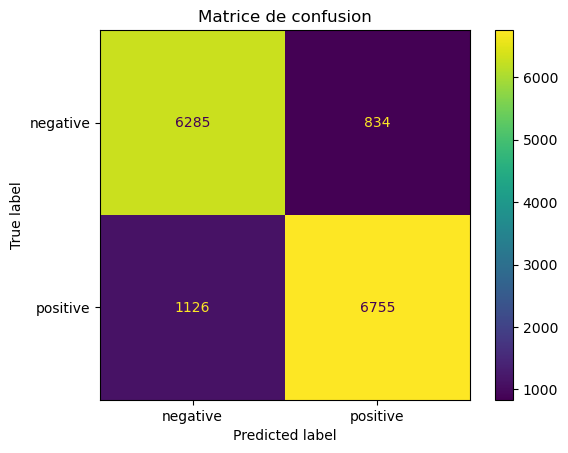

Score de précision moyenne: 0.8693333333333333 soit: 86.93%


In [34]:
from sklearn import metrics
y_pred = pipeline1.predict(X_test)
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["negative","positive"])
cm_display.plot()
plt.title("Matrice de confusion")
plt.show()

from sklearn.metrics import f1_score,accuracy_score

# Calculer le score de précision moyenne
avg_precision =accuracy_score(y_test,y_pred)
print("Score de précision moyenne:", avg_precision,"soit: {:.2f}%".format( avg_precision*100))

    XGBClassifier

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Nettoyage du texte
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cleaned_texts = []
        for text in X:
            text = text.lower()  # Mettre en minuscule
            text = re.sub(r'<.*?>', '', text)  # Supprimer le HTML
            text = re.sub(r'\[.*?\]', '', text)  # Supprimer les crochets carrés et leur contenu
            text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer les caractères spéciaux et les chiffres
            words = word_tokenize(text)  # Tokenisation
            words = [word for word in words if word not in stopwords.words('english')]  # Supprimer les mots vides
            stemmer = PorterStemmer()
            words = [stemmer.stem(word) for word in words]  # Stemming
            cleaned_text = ' '.join(words)
            cleaned_texts.append(cleaned_text)
        return cleaned_texts


# Exemple de données avec des classes textuelles (ajustez selon vos données)
# Supposons que target ait des valeurs comme 'positive' et 'negative'
# target = data2['sentiment']

# Convertir les classes textuelles en labels numériques
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # 'negative' -> 0, 'positive' -> 1

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42, stratify=target_encoded)

# Définition du pipeline avec XGBoost (XGBClassifier)
pipeline2 = Pipeline([
    ('cleaner', TextCleaner()),  # Étape de nettoyage de texte
    ('vectorizer', TfidfVectorizer()),  # Vectorisation des mots avec TF-IDF
    ('classifier', XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.1))  # Modèle XGBoost
])

# Entraînement du pipeline
pipeline2.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Prédictions et évaluation
y_pred = pipeline2.predict(X_test)

# Décoder les prédictions en texte
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Affichage du rapport de classification
print(classification_report(y_test_decoded, y_pred_decoded))
#print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      7500
    positive       0.86      0.88      0.87      7500

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



    GradientBoostingClassifier

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cleaned_texts = []
        for text in X:
            text = text.lower()  # Convert to lowercase
            text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
            text = re.sub(r'\[.*?\]', '', text)  # Remove square brackets and their content
            text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and digits
            words = word_tokenize(text)  # Tokenization
            words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
            stemmer = PorterStemmer()
            words = [stemmer.stem(word) for word in words]  # Stemming
            cleaned_text = ' '.join(words)
            cleaned_texts.append(cleaned_text)
        return cleaned_texts
    

# Split data into training and testing sets
features = data_imdb['review']
target = data_imdb['sentiment']
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)  # 'negative' -> 0, 'positive' -> 1

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define the pipeline with GradientBoostingClassifier
pipeline3 = Pipeline([
    ('cleaner', TextCleaner()),  # Step to clean the text
    ('vectorizer', TfidfVectorizer()),  # Vectorize words using TF-IDF
    ('classifier', GradientBoostingClassifier(n_estimators=500, max_depth=6, learning_rate=0.1))  # Gradient Boosted Trees model
])

# Train the pipeline
pipeline3.fit(X_train, y_train)

from sklearn.metrics import classification_report

# Make predictions and evaluate the model
y_pred = pipeline3.predict(X_test)
print(classification_report(y_test, y_pred))  # Use y_test and y_pred in classification_report
#print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      7411
    positive       0.85      0.89      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [ ]:
from sklearn import metrics
y_pred = pipeline3.predict(X_test)
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["negative","positive"])
cm_display.plot()
plt.title("Matrice de confusion")
plt.show()

from sklearn.metrics import f1_score,accuracy_score

# Calculer le score de précision moyenne
avg_precision =accuracy_score(y_test,y_pred)
print("Score de précision moyenne:", avg_precision,"soit: {:.2f}%".format( avg_precision*100))

### Evalutation du model

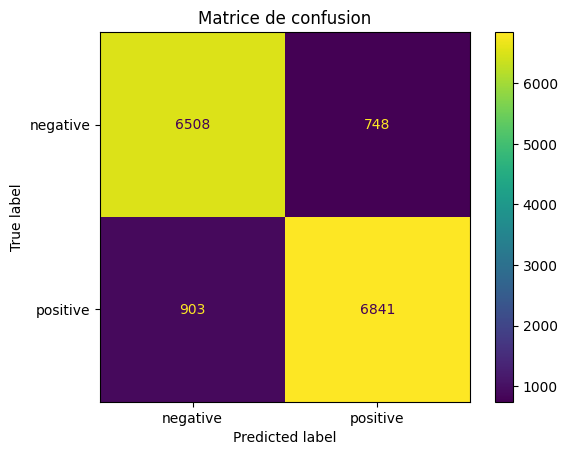

Score de précision moyenne: 0.8899333333333334 soit: 88.99%


In [54]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=["negative","positive"])
cm_display.plot()
plt.title("Matrice de confusion")
plt.show()

from sklearn.metrics import f1_score,accuracy_score

# Calculer le score de précision moyenne
avg_precision =accuracy_score(y_test,y_pred)
print("Score de précision moyenne:", avg_precision,"soit: {:.2f}%".format( avg_precision*100))

###  Prédiction avec le pipeline

In [59]:
reviews=["Petter Mattei's 'Love in the Time of Money' is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work. "]
# Afficher les prédictions
for text, prediction in zip(reviews, pipeline.predict(reviews)):
    print(f"Texte : {text} | Prédiction :",prediction)

Texte : Petter Mattei's 'Love in the Time of Money' is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the cas

####  Résultat des autres modeles (tfidf)

<div>
    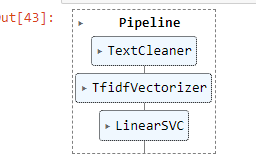
    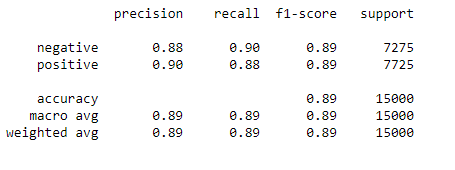
    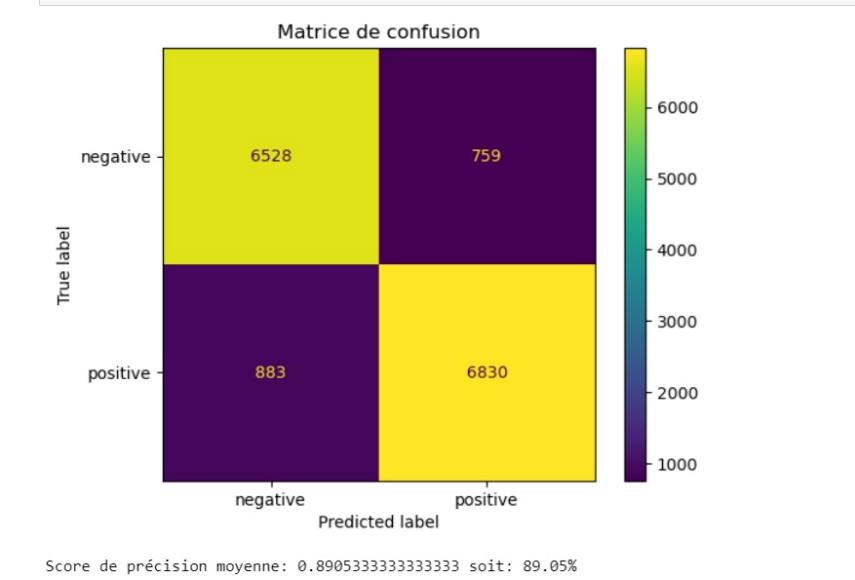
</div>

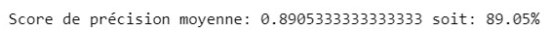

<div>
    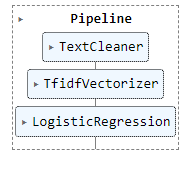
    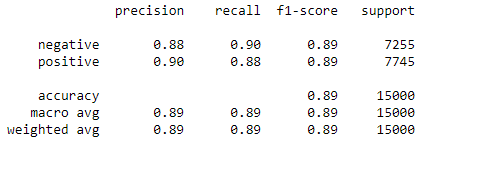
    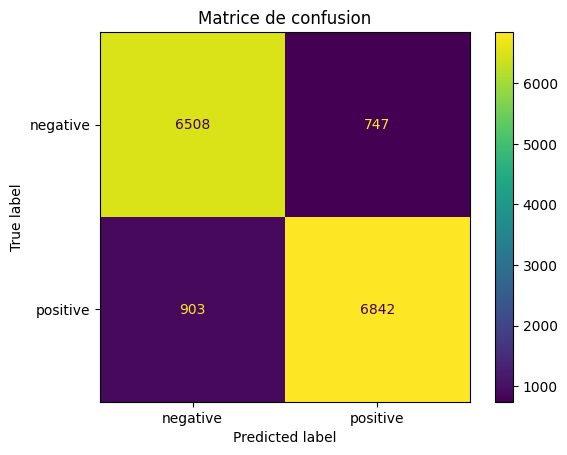
    
</div>

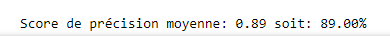

<div>
    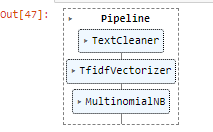
    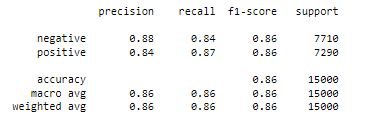
    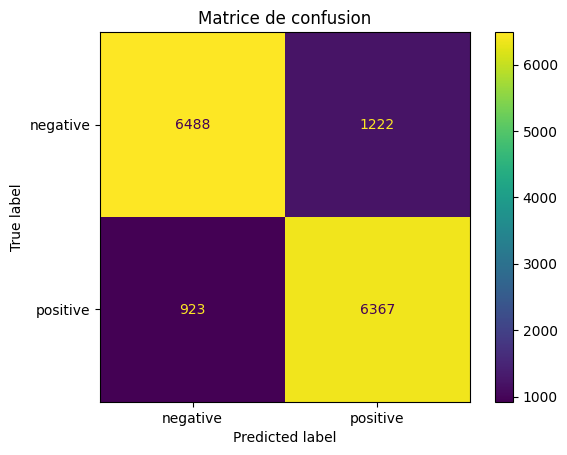
</div>



| 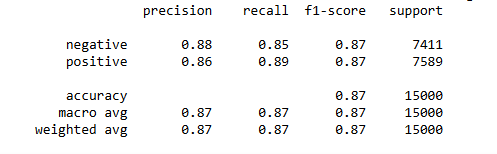 | 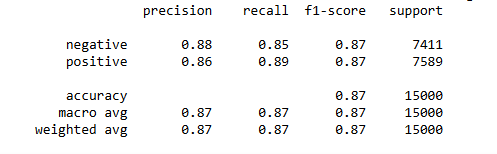| 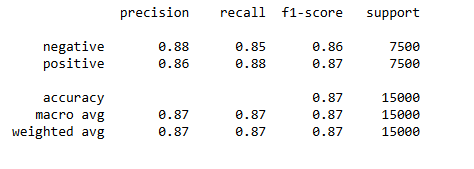 |
|:-------------------------------------------------------:|:-------------------------------------------------:|:---------------------------------------------------------------:|
| **CatBoostClassifier**                                  | **XGBClassifier**                                  | **GradientBoostingClassifier**                                  |


               BOW sac de mot

| 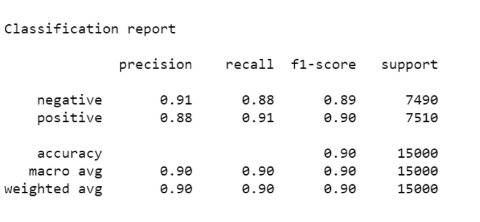 |
|:--------------------------------------------------------:|
| **Logistic Regression**                                  |
